<a href="https://colab.research.google.com/github/WillianReinaG/pregunta-smart-icesi/blob/main/taller4datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Importamos las librerias que usaremos en este practica

import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Pandas/student_performance_prediction.csv',    #Ruta completa a la ubicación del archivo de interés.
                 na_values='?')              #Como el archivo contiene algunos caracteres ?, con este comando pandas los interpreta como nan (not a number).

In [30]:
df.shape

(40000, 7)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [32]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [33]:
df.tail()


,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No
39999,S40000,11.8,55.1,68.5,No,Bachelor,Yes


In [34]:
# datos nulos
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [35]:
#Gracias a pandas tenemos un metodo que hace esto mucho más simple
#Le aplicamos a una columna del df  el metodo fillna
#En los parametros de fillna le damos la media de la columna y el inplace=true (el inplace true significa que va modificar el df)
df['Study Hours per Week'].fillna(df['Study Hours per Week'].mean(), inplace=True)
df['Attendance Rate'].fillna(df['Attendance Rate'].mean(), inplace=True)
#df['Previous Grades'].fillna(df['Previous Grades'].mean(), inplace=True)

In [36]:
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [37]:
# KNNImputer
#En este caso usaremos un modelo de knn para darle un valor a nuestros valores nulos
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Entrenamos el modelo
imputer.fit(df[["Previous Grades"]])

#Reemplazamos los valores nulos
df["Previous Grades"] = imputer.transform(df[["Previous Grades"]]).ravel()

In [38]:
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [45]:
# prompt: reemplace NaN para datos tipo objecto

# Para reemplazar los valores nulos en columnas con datos tipo object
# usaremos la moda

for column in ["Participation in Extracurricular Activities", "Parent Education Level", "Passed"]:
  # Calculamos la moda
  mode = df[column].mode()[0]
  # Reemplazamos los valores nulos con la moda
  df[column].fillna(mode, inplace=True)

# Verificamos que no haya valores nulos
df.isnull().sum()


,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,0


In [46]:
# Veamos los tipos de datos para cada columna:
df.dtypes

,0
Student ID,object
Study Hours per Week,float64
Attendance Rate,float64
Previous Grades,float64
Participation in Extracurricular Activities,object
Parent Education Level,object
Passed,object


In [ ]:
# Como podemos ver arriba, los tipo de datos son correcto.
# Las variables numéricas son de tipo 'float64' ya que son numeros con decimales
# y las variables con cadenas de texto como categorías son de tipo 'object'
# si fuera nesecario se utilizaria la formula acontinucion
# df[["Nombre1", "Nombre2"]] = df[["Nombre1", "Nombre2"]].astype("float")
# df[["Nombre3", "Nombre4"]] = df[["Nombre3", "Nombre4"]].astype("int")

In [48]:
#Normalización de los datos
# proceso de transformar valores de varias variables a un rango similar 0 a 1
# Reemplazar valor original por (valor original)/(valor máximo)
df['Attendance Rate'] = df['Attendance Rate']/df['Attendance Rate'].max()
df['Previous Grades'] = df['Previous Grades']/df['Previous Grades'].max()

# Ver las columnas escaladas
df[["Attendance Rate","Previous Grades"]].head()

,Attendance Rate,Previous Grades
0,0.501174,0.3750
1,0.634487,0.3030
2,0.501174,0.3200
3,0.511318,0.3120
4,0.594541,0.3635


In [49]:
#discretizar valores
df["Study Hours per Week"]=df["Study Hours per Week"].astype("int", copy=True)

Text(0.5, 1.0, 'Study Hours per Week vs #alumnos')

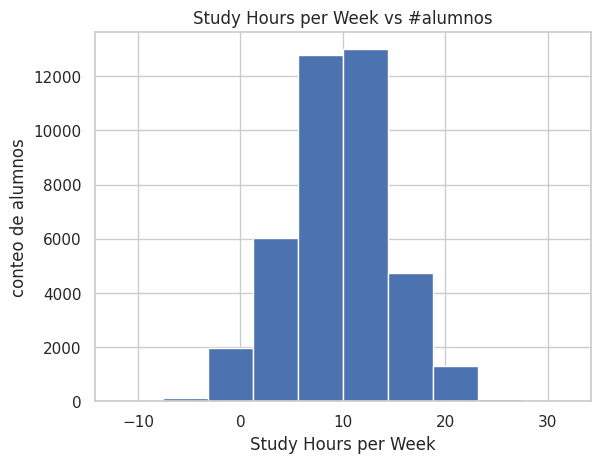

In [50]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Study Hours per Week"])

# Establecer las etiquetas x/y y el título del gráfico
plt.pyplot.xlabel("Study Hours per Week")
plt.pyplot.ylabel("conteo de alumnos")
plt.pyplot.title("Study Hours per Week vs #alumnos")

In [67]:
bins = np.linspace(min(df["Study Hours per Week"]), max(df["Study Hours per Week"]), 4)
bins

array([-12.        ,   2.66666667,  17.33333333,  32.        ])

In [68]:
group_names = ['Low', 'Medium', 'High']

In [69]:
df['Study Hours per Week-discretos'] = pd.cut(df['Study Hours per Week'], bins, labels=group_names, include_lowest=True )
df[['Study Hours per Week','Study Hours per Week-discretos']].head(20)

,Study Hours per Week,Study Hours per Week-discretos
0,12,Medium
1,9,Medium
2,13,Medium
3,17,Medium
4,8,Medium
5,8,Medium
6,17,Medium
7,13,Medium
8,7,Medium
9,12,Medium


In [70]:
df["Study Hours per Week"].value_counts()

,count
Study Hours per Week,
9,4955
10,3074
8,2875
11,2826
12,2690
7,2616
13,2369
6,2340
5,2078


Text(0.5, 1.0, 'Study Hours per Week (valores discretos) vs #alumnos')

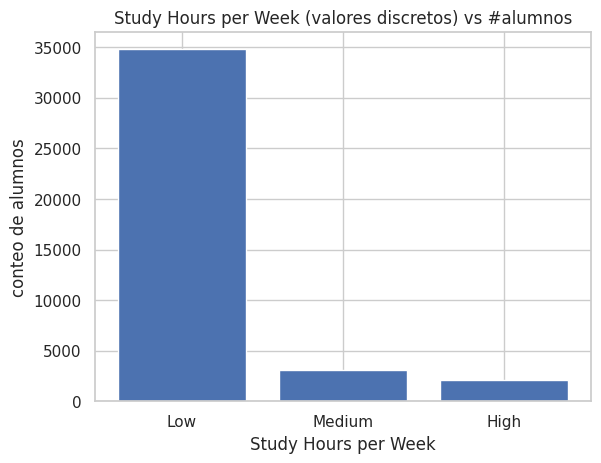

In [71]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Study Hours per Week-discretos"].value_counts())

# Establecer las etiquetas x/y y el título del gráfico
plt.pyplot.xlabel("Study Hours per Week")
plt.pyplot.ylabel("conteo de alumnos")
plt.pyplot.title("Study Hours per Week (valores discretos) vs #alumnos")

en su gran totalidas las horas de estudio semanales de los alumnos es muy baja.

De los 40000 filas se encontraron hasta 2000 datos de una columna faltantes equivalentes a un 5 % de la información que de no se bien tractado los datos podrían cambiar o reducir la precisión en la información y posibles desviación de conclusiones.
Se utilizo la media y KNNI para imputar los datos,
Re revisaron que el tipo de datos correspondiera a los valores en tabla
Se realizo normalización de valores para tenerlos en un rango de 1 y 0 para que tengan el mismo peso y se realiza grafico de las horas de estudio semanales de los alumnos, separamos por grupos de horas de estudio semanales de los alumnos y dividio en tres grupos las horas de estudio semanal he identificar que grupo están utilizando mas los alumnos de horas de estudio semanal.
